# Linear Regression

In [18]:
# imports
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import random

# gif generation
import imageio
import os

## Basic Building Blocks

### Linear Model

In [19]:
def linreg(X, w, b):
    return (X @ w) + b

### Loss Function

In [20]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

## Visuals

### 2D Plot

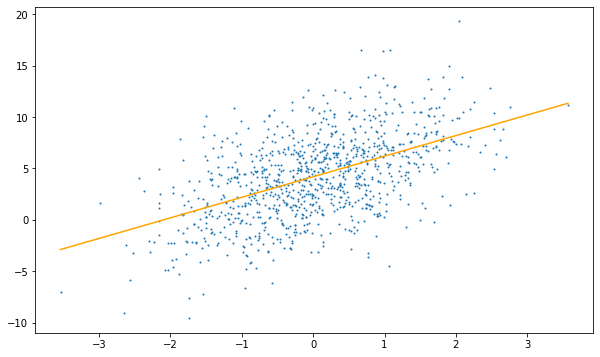

In [21]:
def plot2D(weight = true_w, bias= true_b, axis = 0):
    feat = features[:, axis].numpy()
    x = np.linspace(min(feat), max(feat), 100)
    plt.figure(figsize=(10, 6))
    plt.scatter(feat, labels.numpy(), 1);
    plt.plot(x, weight[axis,0] * x + bias, color="orange")

plot2D()

### 3D Plot

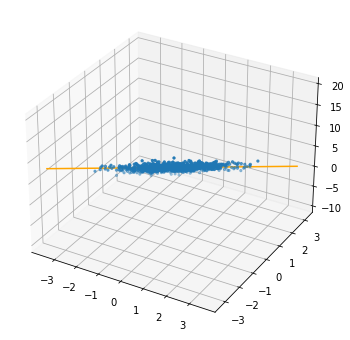

In [22]:
def plot3D(weights = true_w, bias = true_b):
    featx = features[:, 0].numpy()
    featy = features[:, 1].numpy()
    x = np.linspace(min(featx), max(featx), 100)
    y = np.linspace(min(featy), max(featy), 100)
    combination = tf.constant(np.vstack((x, y)).T, dtype=tf.float32)
    res = (combination @ weights) + bias
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(features[:, 0].numpy(),features[:, 1].numpy(), labels.numpy(), marker=".");
    ax.plot(x, y, res.numpy().flatten(), color="orange")


plot3D()

### GIF

In [23]:
def createGIFfromImages(filenames):
    with imageio.get_writer(f'2d.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    #Remove files
    for filename in set(filenames):
        os.remove(filename)

In [34]:
def saveFigure(epoch, filenames, plot,  w, b):
    filename = f'{epoch}.png'
    filenames.append(filename)
    plot(w,b)
    plt.savefig(filename)
    plt.close()

## Dataset Generation

In [24]:
num_inputs = 2
num_examples = 1000

# y = w^T*x + b
# y = [2, -3,4]^T*[a,b] + 4.2
true_w = tf.constant([2,-3.4], shape=(2,1)) # [2, -3,4]^T
true_b = 4.2 # 4.2

features = tf.random.normal((num_examples, num_inputs))
labels = (features @ true_w) + true_b 

true_w.shape, features.shape, labels.shape

(TensorShape([2, 1]), TensorShape([1000, 2]), TensorShape([1000, 1]))

## Training

### Batching

In [25]:
# generator over the dataset with a specified batch size
# every iteration gives another random batch
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels,j)

In [26]:
for x,y in data_iter(10, features, labels):
    print( x,y)
    break

tf.Tensor(
[[ 1.0185773   0.986994  ]
 [-0.5436667   1.0189847 ]
 [-0.45019284 -0.93439335]
 [ 0.74277306  1.9697198 ]
 [ 0.5462507  -0.5941047 ]
 [-1.2264278   0.27733886]
 [-0.895169    0.2499783 ]
 [ 0.03452009 -0.49754176]
 [-1.462727   -0.92854524]
 [ 1.1872073  -1.5773089 ]], shape=(10, 2), dtype=float32) tf.Tensor(
[[ 2.8813746 ]
 [-0.35188198]
 [ 6.476552  ]
 [-1.0115013 ]
 [ 7.312457  ]
 [ 0.80419207]
 [ 1.5597355 ]
 [ 5.960682  ]
 [ 4.4315996 ]
 [11.937264  ]], shape=(10, 1), dtype=float32)


### Gradient Descent

In [63]:
def sgd(w, b, lr, batch_size, features, labels):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as tape:
            l = squared_loss(linreg(X, w, b),y) # calculates the loss of the batch (vector with loss for every point)   
            [gradw, gradb] = tape.gradient(l, [w,b]) # the gradient of the loss with respect to our weights and bias
           
            # backpropergation
            w.assign_sub(gradw*lr/batch_size)
            b.assign_sub(gradb*lr/batch_size)
        break
    return w,b

### Training

Initial weight:
 [[ 0.01328109]
 [-0.00961274]] 
Initial bias:
 [0.]
epoch: 1, loss (mean): 15.217693
epoch: 2, loss (mean): 14.391824
epoch: 3, loss (mean): 13.536836
epoch: 4, loss (mean): 12.714522
epoch: 5, loss (mean): 11.461989
epoch: 6, loss (mean): 10.858861
epoch: 7, loss (mean): 9.947920
epoch: 8, loss (mean): 9.433848
epoch: 9, loss (mean): 9.087522
epoch: 10, loss (mean): 8.447901
epoch: 11, loss (mean): 8.020996
epoch: 12, loss (mean): 7.709570
epoch: 13, loss (mean): 7.401051
epoch: 14, loss (mean): 6.983249
epoch: 15, loss (mean): 6.635425
epoch: 16, loss (mean): 6.202971
epoch: 17, loss (mean): 5.753181
epoch: 18, loss (mean): 5.466716
epoch: 19, loss (mean): 5.163765
epoch: 20, loss (mean): 4.857437
epoch: 21, loss (mean): 4.675664
epoch: 22, loss (mean): 4.509987
epoch: 23, loss (mean): 4.291568
epoch: 24, loss (mean): 4.066198
epoch: 25, loss (mean): 3.941784
epoch: 26, loss (mean): 3.593380
epoch: 27, loss (mean): 3.448099
epoch: 28, loss (mean): 3.311338
epoch: 29,

C:\Users\murphy\AppData\Local\Temp\ipykernel_1048\1417004249.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


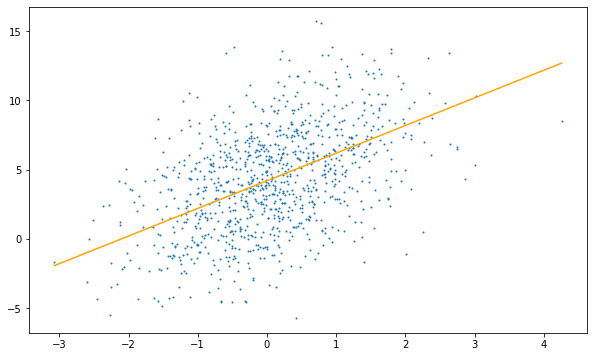

In [65]:
filenames = []

lr = 0.03  # Learning rate
num_epochs = 200 # Number of iterations
batch_size = 10

w = tf.Variable(tf.random.normal((num_inputs, 1), stddev=0.01))
b = tf.Variable(tf.zeros((1,)))
print("Initial weight:\n", w.numpy(), "\nInitial bias:\n", b.numpy())

for epoch in range(num_epochs):
    w,b = sgd(w, b, lr, batch_size, features, labels)
    
    train_l = squared_loss(linreg(features, w, b), labels)
    print('epoch: %d, loss (mean): %f' % (epoch + 1, tf.reduce_mean(train_l).numpy()))
    
    saveFigure(epoch, filenames, plot2D, w, b)

createGIFfromImages(filenames)
plot2D(w, b)

In [66]:
print('Error in estimating w:\n', (true_w - w).numpy())
print('Error in estimating b:\n', (true_b - b).numpy())

Error in estimating w:
 [[ 0.00474095]
 [-0.01125932]]
Error in estimating b:
 [0.00857592]
